<img src="https://github.com/christopherhuntley/BUAN5405-docs/blob/master/Slides/img/Dolan.png?raw=true" width="180px" align="right">

# **Lesson 11: pandas DataFrames**
_The Swiss Army Knife of Data Science_

## **Learning Objectives**
### Theory / Be able to explain ...
- The fundamental structure and characteristics of data tables
- Row-dominant vs column-dominant table design
- The features of pandas `Series` and `DataFrame` objects
- Column assignment for row-by-row calculations
- Functions and methods of DataFrame objects

### Skills / Know how to  ...
- Structure data tables with nested lists and dictionaries
- Create `Series` and `DataFrame` objects from lists and dictionaries
- Read/write DataFrame objects from/to external data stores
- Create/modify DataFrame columns from existing columns
- Select data with `[]`, `loc[]`, and `iloc[]`
- Generate descriptive stats and plots from a DataFrame

**This is new content you won't find in the Py4E book. Consider it a preview of your next course in Python for analytics. All roads eventually lead to pandas DataFrames.**

---

## **Datasets, Data Tables, and DataFrames ...**
> "A rose by any other name would smell as sweet" -- _Romeo and Juliet_

Science applications have always been a key driver of computer innovation. The first really useful digital computers were developed to support physics research. The architect was John von Neumann, a biologist and mathematician. Even today, some of the hardest work that computers do is in the biosciences. And as every middle school Earth Science student will tell you, that means collecting data, drawing inferences, and validating results. 

Here we will focus on the start of that process, collecting data into coherent **datasets**, which are almost always in tabular form, indexed by order or perhaps a timestamp. 

In Python the right tool for working with datasets is **pandas**, which combines:
- the integrity protections of a relational database
- the flexibility of a spreadsheet
- the raw computational power of numpy or matlab
- the expressiveness of a high end data visualization package

We will start with a look at data tables _without_ pandas. Then we'll see how pandas makes them so much more expressive and powerful. 

---
## **Data Tables**
In traditional usage a data table has the following structure that owes a lot to the form, function, and type discussion from Lesson 2: 
- Tables have rows and columns
- Each row records data for one entity (observation or instance)
- Each column represents a feature or measurement from the observation
- Data in each column are of the same type
- No row has any "extra" or "repeated" data or columns 
- The rows are indexed (by date, order, or otherwise) for fast and easy retrieval

While we have seemingly always thought of data tables this way, it wasn't until E. F. Codd's work in the early 1970s that these notions became best practice. Today, of course, these six rules are the foundation of the relational database model used throughout the world to keep data safe. 

When implementing these rules, there are two approaches that are functionally equivalent yet distinctly different in feel. 
- **Row dominant** data structures record data one row at a time. Each row is a **record**, with one field per feature.  
- **Column dominant** data structures store data one column at a time. Each column is a **vector** of data for one feature. 

The choice of which approach to adopt is largely up to the programmer, of course, but it can be influenced by the programming language. Languages that are often used by **engineers**, like C/C++ and SQL, tend toward row dominance. On the other hand, languages that are used more by **scientists and mathematicians**, like R or Fortran, are more column-oriented. 

Fortunately Python can go either way, depending on how we choose to structure the data. 

### **Lists of Dictionaries (Row Dominance)**
If data is to be added row by row, entity by entity, then the most natural way to structure the data is with a `list` of `dict`s with a standardized key for each feature.

In [ ]:
# a list of dicts (records)
presidents_by_row = [ {'birthdate':'1732-02-22','name': "George Washington", 'inaugurated': '1789-04-30'},
                      {'birthdate':'1735-10-30','name': "John Adams", 'inaugurated': '1797-03-04'},
                      {'birthdate':'1743-04-13','name': "Thomas Jefferson", 'inaugurated': '1801-03-04'}]

# appending a more dicts as data becomes available
presidents_by_row += [ {'birthdate':'1751-03-16','name': "James Madison", 'inaugurated': '1809-03-04'},
                       {'birthdate':'1758-04-28','name': "James Monroe", 'inaugurated': '1817-03-04'}]

Again, if you are recording things in the order they occur (like a system log or baseball game statistics), then this is the way to do it. However, let's assume that you want to get just one column from the table. For that we'd need to use something like a list comprehension:

In [ ]:
inauguration_dates = [p['inaugurated'] for p in presidents_by_row]

### **Dictionaries of Lists (Column Dominance)**
Statisticians who work with data _after_ it has been collected tend to prefer the column-dominant approach, which we can implement with a `dict` of `list`s. 

In [ ]:
presidents_by_col = {'birthdate': ['1732-02-22','1735-10-30','1743-04-13','1751-03-16'],
                     'name': ["George Washington","John Adams","Thomas Jefferson","James Madison"],
                     'inaugurated': ['1789-04-30','1797-03-04','1801-03-04','1809-03-04']}

Each column has a name and an array of data of the same type,  one element per entity. This makes it really super easy to process each column separately for things like histograms, averages, etc. Further, as long as we take care with the length and ordering of the lists, it makes adding new columns as easy as adding a new key to a dictionary (because that's exactly how we would do it). 

However, it gets trickier when adding a new row of data. Then we have to modify the list for each column. If we forget a column then we could corrupt our data. 

In [ ]:
new_president = {'birthdate':'1758-04-28','name': "James Monroe", 'inaugurated': '1817-03-04'}

presidents_by_col['birthdate']   += [new_president['birthdate']]
presidents_by_col['name']        += [new_president['name']]
presidents_by_col['inaugurated'] += [new_president['inaugurated']]

--- 
## **The pandas `Series`**
A pandas `Series` represents a 1-dimensional vector of data such that
- Each element is of the same type
- The elements are indexed by a hashable type

In our data table analogy, a `Series` is a single column of data with an **index** for fast access and to keep things in the proper order. We'll come back to the properties of an index, but first let's consider a couple examples. 

In [ ]:
import pandas as pd
birthdates = pd.Series(['1732-02-22','1735-10-30','1743-04-13','1751-03-16'])
birthdates

0    1732-02-22
1    1735-10-30
2    1743-04-13
3    1751-03-16
dtype: object

Some observations:
- We imported the pandas library using the customary `pd` alias. Usually you would do this at the very top of your Jupyter notebooks. 
- The `Series` is generated from a list of birthdates
- pandas add an index, numbered from 0, to allow us to keep the birthdates in order
- Each item in the series is of the same (generic) `object` data type

If we like we can give the `Series` a name. We can also change the data type from `object` to `datetime`. 

In [ ]:
birthdates.name = 'birthdates'    # Set the `name` property
pd.to_datetime(birthdates)        # Convert all data to datetime

0   1732-02-22
1   1735-10-30
2   1743-04-13
3   1751-03-16
Name: birthdates, dtype: datetime64[ns]

### **pandas Indexes**
While the index values used in the above examples are integers, they don't have to be. We can index using any **hashable** data type, just like dictionary keys. So, if we wanted to index based on strings, that is perfectly fine. 

In [ ]:
birthdates = pd.Series(['1732-02-22','1735-10-30','1743-04-13','1751-03-16'], 
                       index=["George Washington","John Adams","Thomas Jefferson","James Madison"], 
                       dtype='datetime64[ns]')
birthdates

George Washington   1732-02-22
John Adams          1735-10-30
Thomas Jefferson    1743-04-13
James Madison       1751-03-16
dtype: datetime64[ns]

One thing that pandas won't do for us (unless we ask) is to enforce unique indexes. Multiple rows can have the same index values. 

Also, note that the index is **not** considered data. It is merely a way to label and look up data from the array. This will become clearer when we work with multiple columns in a `DataFrame`.

---
## **The pandas `DataFrame`**
A data frame is equivalent to column-dominant (dictionary of lists) data tables. It is a standard data type in R as `data.frame`. In pandas we use `DataFrame`. It has all of the properties and functions of a pandas `Series` but with support for multiple columns (and more).

We can create `DataFrame` objects by
- Creating an empty dataframe and adding columns _or rows_ as desired
- Converting from a list of dictionaries or a dictionary of lists 
- Importing from a file or url
We can also, of course, convert back to any of these, including writing data to a file or url. 

### **Building a `DataFrame` from Scratch**
To create an empty DataFrame we can just call the `pd.DataFrame()` constructor function. 

In [ ]:
df = pd.DataFrame()
df

""


We can define empty columns by specifying them in the constructor and even add more later. 

In [ ]:
df = pd.DataFrame(columns = ["birthdate","name"])
df['inaugurated'] = ''  # Add a column like we'd add to a list
df

,birthdate,name,inaugurated


To add rows we use `append()`. We can append multiple rows at a time using the list of dictionaries technique. 

In [ ]:
df=df.append(presidents_by_row)
df

,birthdate,name,inaugurated
0,1732-02-22,George Washington,1789-04-30
1,1735-10-30,John Adams,1797-03-04
2,1743-04-13,Thomas Jefferson,1801-03-04
3,1751-03-16,James Madison,1809-03-04
4,1758-04-28,James Monroe,1817-03-04


To add columns we use the same assignment-based technique as before, just this time with a list of data:

In [ ]:
df['Spouse']=pd.Series(['Martha Washington','Abigail Adams', 'Martha Jefferson', 'Dolly Madison','Elizabeth Monroe'])
df

,birthdate,name,inaugurated,Spouse
0,1732-02-22,George Washington,1789-04-30,Martha Washington
1,1735-10-30,John Adams,1797-03-04,Abigail Adams
2,1743-04-13,Thomas Jefferson,1801-03-04,Martha Jefferson
3,1751-03-16,James Madison,1809-03-04,Dolly Madison
4,1758-04-28,James Monroe,1817-03-04,Elizabeth Monroe


#### **Indexes are not Data Columns**
Notice in the examples that the index column does not have a name. That's because pandas does not consider it data. It's part of the design of the table. **If you want a column to also act as the index, then add a duplicate column and mark it as the index afterwards.**

### **Converting from Nested Collections**
While it is nice to know that we can build up from scratch, often we will already have the dataset in hand and just want to convert it all at once. We can do that using either of our data table formats. Each of the two DataFrames below are equivalent. 

In [ ]:
df_by_row = pd.DataFrame(presidents_by_row)
df_by_row

,birthdate,name,inaugurated
0,1732-02-22,George Washington,1789-04-30
1,1735-10-30,John Adams,1797-03-04
2,1743-04-13,Thomas Jefferson,1801-03-04
3,1751-03-16,James Madison,1809-03-04
4,1758-04-28,James Monroe,1817-03-04


In [ ]:
df_by_col = pd.DataFrame(presidents_by_col)
df_by_col

,birthdate,name,inaugurated
0,1732-02-22,George Washington,1789-04-30
1,1735-10-30,John Adams,1797-03-04
2,1743-04-13,Thomas Jefferson,1801-03-04
3,1751-03-16,James Madison,1809-03-04
4,1758-04-28,James Monroe,1817-03-04


### **The pandas I/O Tools**
The pandas [I/O API](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) provides an impressive array of options for reading and writing DataFrames from/to external data sources. We will only consider one of the more commonly used ones. To learn about the others, [RTFM](https://en.wikipedia.org/wiki/RTFM) the pandas I/O docs. We all do it, just about every time we have to import or export something in pandas. 
> ![pandas io](https://github.com/christopherhuntley/BUAN5405-lessons/raw/master/img/L11_pandas_io.png)

#### **Reading CSV Files with `read_csv()`**
The most common way to import data into pandas is with `read_csv()`, a function that reads tables in Comma Separated Values (CSV) format. It comes with a long list of parameters that we can pass as configuration arguments. The only required one is the first, `filepath`.
- `filepath` is a local file system path, url, or a text stream. It tells the function where to find the data. In the remaining parameter descriptions we will assume that we are reading from a file, but the meaning is the same for the other sources. 
- `delimiter` sets the character used to separate columns. The default is a comma but we can use `\tab` or any other single character we choose. If we don't want to choose we can leave it with the default or set the `delim_whitespace` argument to True.
- `header` indicates what line (row) of the file to look for column names (headers). The default is to look on the first line of the file.
- `names` allows us to override whatever column names are provided in file. 
- `index_col` sets the column to use for the DataFrame index. We can supply either the column name (string) or its position (int). The default is `None`, which tells pandas to inidex it for us with 0, 1, 2, etc.
- `use_cols` allows us to skip some columns we don't want by supplying a `list` of the ones we do want. As with `index_col` we can use names or positions.
- `dtype` sets the data type for a column by name by passing a dictionary of data types. We can also tell it to use the same data type for all columns.
- `parse_dates` indicates which columns (including the index) to treat as `datetime` values. 

And many, many more. 

---
## **Column (Per-Row) Assignment** 

One we have the data in a DataFrame we can create new columns from existing columns like this:

In [ ]:
presidents_df = pd.DataFrame(presidents_by_row)

# convert the birthdates and inauguration dates to datetime values
presidents_df['birthdate'] = pd.to_datetime(presidents_df['birthdate'])
presidents_df['inaugurated'] = pd.to_datetime(presidents_df['inaugurated'])

# Calculate the age in years as a float
presidents_df['age_at_inauguration'] = 
  (presidents_df['inaugurated'] - presidents_df['birthdate']).dt.days/(365.25)
presidents_df

,birthdate,name,inaugurated,age_at_inauguration
0,1732-02-22,George Washington,1789-04-30,57.185489
1,1735-10-30,John Adams,1797-03-04,61.344285
2,1743-04-13,Thomas Jefferson,1801-03-04,57.889117
3,1751-03-16,James Madison,1809-03-04,57.965777
4,1758-04-28,James Monroe,1817-03-04,58.847365


A few remarks:
- Whenever a column is referenced on the left of the `=`, pandas assumes we want to change each value in the column. It will repeat the assignment for each row. The expression of the right right of the `=` can refer to any or all of the columns in the DataFrame. 
- Here we are converting each birthdate and inauguration date to proper Python dates so we can do date arithmetic. 
- The difference between the two dates is then converted to years and added as the new column `age_at_inauguration`.

---
## **Slicing, `loc[]`, and `iloc[]`**
### **Selections with `[]`**
We have already seen what the `[]` operator does when given a DataFrame. If given the name of a column it always returns a `Series`. 

In [ ]:
presidents_df['inaugurated']

0   1789-04-30
1   1797-03-04
2   1801-03-04
3   1809-03-04
4   1817-03-04
Name: inaugurated, dtype: datetime64[ns]

We cannot, however, select the same column by position:

In [ ]:
presidents_df[2]

KeyError: ignored

That's okay. We can just use the column names. 

However, **how do we retrieve _rows_ of data?** For that we need to use slicing, which always operates on row indexes. If the index is integer valued then we use the position of the row we want plus the next row (which we don't want). If the index is a string or other categorical type then the end point is included in the slice. 

In [ ]:
presidents_df[2:4]

,birthdate,name,inaugurated,age_at_inauguration
2,1743-04-13,Thomas Jefferson,1801-03-04,57.889117
3,1751-03-16,James Madison,1809-03-04,57.965777


If we want a particular value in a column, then we select the column and row like this:

In [ ]:
presidents_df['inaugurated'][2]

Timestamp('1801-03-04 00:00:00')

We can even slice the columns like a list. 

In [ ]:
presidents_df['inaugurated'][2:]

2   1801-03-04
3   1809-03-04
4   1817-03-04
Name: inaugurated, dtype: datetime64[ns]

As if the name DataFrame (as in R) was not enough of a clue, the above demonstration is what poker players would call a "tell" about the views of the pandas developers in the "row vs column" debate.  When using bracket selectors, the column comes before the row. **By default, pandas is column-dominant.**

### **Selections with `iloc[]` and `loc[]`**
If we want to slice a piece out of a DataFrame using both rows and columns, then we need to use the `iloc[]` and `loc[]` operators. Both operators extend the usual `[]` operator to deal with pandas's unique way of handling data. They are "called" using dot notation like a method but are really operators. 

The `iloc[]` operator works with positions:
```python
dataframe.iloc[ row_slice, col_slice ]
```
where `row_slice` or `col_slice` can be any of the following
- a single integer position
- a start : end slice object
- a list of integer positions
- a boolean array of selections
- a function that returns one of the above

That's a lot of possibilities. Let's try some of them out. 

In [ ]:
presidents_df.iloc[2:4,2]     # rows 2 and 3, column 2

2   1801-03-04
3   1809-03-04
Name: inaugurated, dtype: datetime64[ns]

In [ ]:
presidents_df.iloc[[0,2],2]   # rows 0 and 2, column 2

0   1789-04-30
2   1801-03-04
Name: inaugurated, dtype: datetime64[ns]

In [ ]:
presidents_df.iloc[[0,2],-3:]  # rows 0 and 2, last 3 columns

,name,inaugurated,age_at_inauguration
0,George Washington,1789-04-30,57.185489
2,Thomas Jefferson,1801-03-04,57.889117


In [ ]:
presidents_df.iloc[[True, True, False, True, True]] # Everybody but Jefferson

,birthdate,name,inaugurated,age_at_inauguration
0,1732-02-22,George Washington,1789-04-30,57.185489
1,1735-10-30,John Adams,1797-03-04,61.344285
3,1751-03-16,James Madison,1809-03-04,57.965777
4,1758-04-28,James Monroe,1817-03-04,58.847365


**The `loc[]` operator works just like `iloc[]` except that it uses indexes and column names.**

In [ ]:
presidents_df.loc[2:4,'name':]

,name,inaugurated,age_at_inauguration
2,Thomas Jefferson,1801-03-04,57.889117
3,James Madison,1809-03-04,57.965777
4,James Monroe,1817-03-04,58.847365


If the indexes are not integers, then use them like strings. 

---
## **Functions & Methods**
pandas [functions](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html) produce new DataFrames. Many (e.g., `concat()`) have method equivalents (e.g., `append()`) that operate in place. There are a few operations, however, that only exist as functions. A few of the more interesting ones:
- `merge()` does a SQL-style join on two DataFrames using the indexes as keys.
- `pivot_table()` generates a spreadsheet-style pivot table.
- `cut()` bins values into discrete intervals.

As a general rule, any function that you can use in Excel also works as a [DataFrame method](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html). But of course pandas does a lot more as well. 
> ![pandas methods](https://github.com/christopherhuntley/BUAN5405-lessons/raw/master/img/L11_pandas_methods.png)

We won't go through all of them; just read the docs. However, there are two methods that warrant a shout out.

### **The `describe()` Method for Descriptive Stats**
If you want to get a quick and dirty statistical summary of your data before more in-depth analysis, just call the `describe()` method. 

In [ ]:
presidents_df.describe()

,age_at_inauguration
count,5.000000
mean,58.646407
std,1.619410
min,57.185489
25%,57.889117
50%,57.965777
75%,58.847365
max,61.344285


### **The `plot()` Method for Generating Plots**
Some people need to see data in plots instead of just statistical summaries. For that use the [`plot()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot), which is built on top of [matplotlib](https://matplotlib.org/), an impressive plotting library that deserves its own lesson. Instead, we will just consider a relatively simple example. 

Let's plot `age_at_inauguration` as a bar chart. Other options include line charts, histograms, box plots, pie charts, scatter plots, and a few others. 

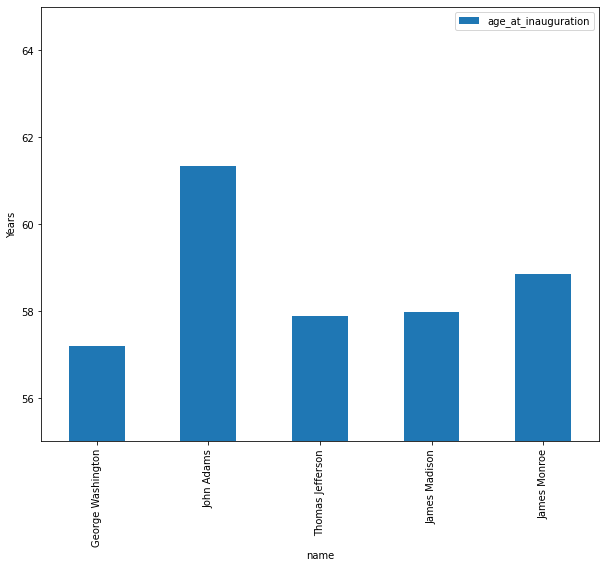

In [ ]:
ax = presidents_df.plot('name','age_at_inauguration',figsize=(10,8), kind='bar', ylim=(55,65))
ax.set_ylabel('Years')
ax

Most of the time the default options are pretty good, at least for a rough plot. However, if you want to get really fancy -- we added a y axis label, for example -- the `plot()` method returns a `maplotlib.axes` object that you can configure further before the plot is rendered by Jupyter. For configuration options consult the [matplotlib.axes docs](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). 

---
## **Exercises**
**1. Read data from [w2h_data.csv](https://raw.githubusercontent.com/christopherhuntley/BUAN5405-lessons/master/w2h_data.csv). Use column assignment to add a column of waist-to hip ratios.** 
- You do not need to determine the shape. However, there is no harm in trying if you have time to read through the docs. Hint: use the `apply()` method with a custom row feeder function.
- Be sure to display the DataFrame as an expression at the end of your code.

In [ ]:
# YOUR CODE HERE

In [ ]:
#@title <--- Check your work
%%html
<div style="max-width: 1000px">
   <div style="position: relative;padding-bottom: 56.25%;height: 0;">
     <iframe style="position: absolute;top: 0;left: 0;width: 100%;height: 100%;" rel="0" modestbranding="1"  
     src="https://www.youtube.com/embed/tfTzy1S05aY"
     frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
   </div>
</div>

**2. Read data from the [ehresp_2015.csv](https://raw.githubusercontent.com/christopherhuntley/BUAN5405-lessons/master/ehresp_2015.csv) dataset. Then use the `describe()` method to better understand the columns. Finally, choose two columns that you think might be correlated and draw a scatter plot to show the correlation.** 
- For more info about the source of the dataset, please read the [info file](https://github.com/christopherhuntley/BUAN5405-lessons/blob/master/EHResp2015_info.txt). You can look for the data dictionary online; it might help you pick out columns to plot.
- Display the first 20 rows for the two columns of your plot. 
- Use the three cells provided. 

In [ ]:
# YOUR CODE HERE TO LOAD AND DESCRIBE DATA FROM THE FILE

In [ ]:
# YOUR CODE HERE TO DISPLAY 20-ROW SAMPLE OF PLOTTED COLUMNS 

In [ ]:
# YOUR CODE HERE TO DISPLAY A SCATTER PLOT

---
## **Before you go ... Submit your work on Google Classroom**
- Save your notebook to be sure it is up to date.
- Go to the assignment in Google Classroom. 
- Turn in your notebook. Your notebook will become read-only. 
- Once it has been reviewed it will be returned and no-longer be read-only.

---
> ## Every Tee Has a Story
> ABOUT REAL WORLD SYSTEMS ANALYSIS    
> It's no secret that it took me 12 years to complete my college education, all of them at the University of Virginia. My major was System Engineering, which when I started was a pretty soft program for engineering school orphans  but had developed into something special by the time I finally finished my PhD studies in 1995. I can honestly say that my life would have been so much worse if I had not lucked into it by picking the only open door I could find when I needed to choose a major. In my SE  classes I learned about systems analysis ("big picture engineering") from true experts, including the guy who coined the phrase "information system" and another who worked with John von Neumann on the very first digital computers. In grad school I was graced to work in a lab at the Institute for Parallel Computation, where I got to play around with lots of prototype supercomputer hardware and take all-expenses-paid trips to conferences around the country. And, of course, I met my future spouse doing homework in my third year. 
>
> This tee is from my last couple years at UVa. It is a commentary on the nature of group work based loosely on the five stages of grief:
1. Enthusiasm
2. Disillusionment 
3. Panic
4. Blame
5. Persecution of the Innocent
6. Praise and Honors for the Undeserving
>
> It's got some truthiness to it, doesn't it.  

![L11 Tee Front](https://github.com/christopherhuntley/BUAN5405-docs/raw/master/Photos/L11_TeeFront.jpeg)
![L11 Tee Back](https://github.com/christopherhuntley/BUAN5405-docs/raw/master/Photos/L11_TeeBack.jpeg)

## Copyright &copy; 2020 Christopher Huntley. All rights reserved. 